In [1]:
# importing necessary library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3

In [4]:
# variables store data values 
a=10 
b=20.8
name='Zeeshan khattak Data Science'
print(a,'\n',b,'\n',name)

10 
 20.8 
 Zeeshan khattak Data Science


In [5]:
# List are store multiple value in a single variable 
my_list =[1,2,3,4,5,7] # A list of Integer 

# Dictionaries Store Data  in key - value Pairs 
my_dic = {'name':'Zeeshan','Age':23,'city':'Islamab'}

# Tuples are Similar to Lists but Are Imutable (Can not Changed)
my_tuple=(10,20,30) # A tuple of Integr


# Set are Collection of Unique Items 
my_set={1,2,3,4,5}


In [7]:
print(my_list)
print(my_dic)
print(my_set)
print(my_tuple)

[1, 2, 3, 4, 5, 7]
{'name': 'Zeeshan', 'Age': 23, 'city': 'Islamab'}
{1, 2, 3, 4, 5}
(10, 20, 30)


In [9]:
## Loops And Function 
for i in range(5): # Loop are used to iterate over a sequence
    print(i) # print(0 to 4)

0
1
2
3
4


In [10]:
## while Loop 
# A while Loop runs as long the Condition is true
count= 0
while count<5:
    print(count)
    count +=1

0
1
2
3
4


In [11]:
# Function 
# Function Are block of code theat perform a Specific Problem 
def add_number(x,y):
    return x+y  # return the sum X and Y



# Calling The function
result = add_number(10,30)
print('Result',result)

Result 40


# Working with Data in Pandas 

### loading Data

In [12]:
# creating a Sample Data Frame using Dictionary 

data ={
    'Name':['Zeeshan','Khan','Maryam','Ayesha'],
    'Age' :[22,21,23,20],
    'Salry':[90000,80000,85000,70000]

}
df =pd.DataFrame(data)
print(df)

      Name  Age  Salry
0  Zeeshan   22  90000
1     Khan   21  80000
2   Maryam   23  85000
3   Ayesha   20  70000


### Basic Data operation


In [13]:
# Selecting A Column from the DataFrame
names=df['Name']
print(names)

0    Zeeshan
1       Khan
2     Maryam
3     Ayesha
Name: Name, dtype: object


In [15]:
# Filtring Rows based on Condition 
high_Salry=df[df['Salry']>80000]
print(high_Salry)

      Name  Age  Salry
0  Zeeshan   22  90000
2   Maryam   23  85000


In [16]:
# grouping Data by Age And Calulating the mean Salry
Avg_salry_by_age=df.groupby('Age')['Salry'].mean()
print(Avg_salry_by_age)

Age
20    70000.0
21    80000.0
22    90000.0
23    85000.0
Name: Salry, dtype: float64


# Data Visulizstion With matplotlib And Seaborn 

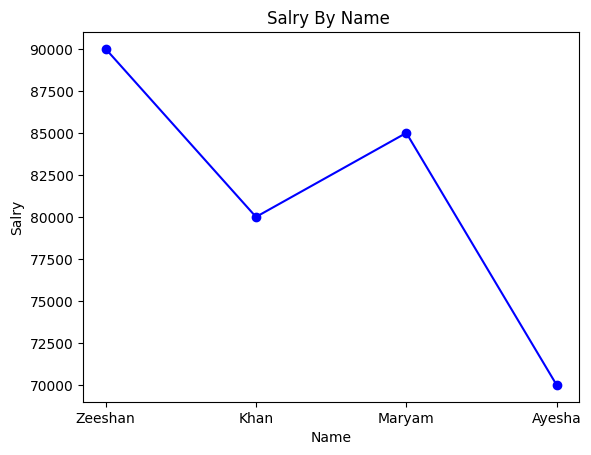

In [17]:
# Matplotlib -Basic Line Plot 
plt.plot(figsize=(8,5)) # set the figure size 
plt.plot(df['Name'],df['Salry'],color='blue',marker='o')
plt.title('Salry By Name ')
plt.xlabel('Name') # x-axis label
plt.ylabel('Salry') # y-label
plt.show()

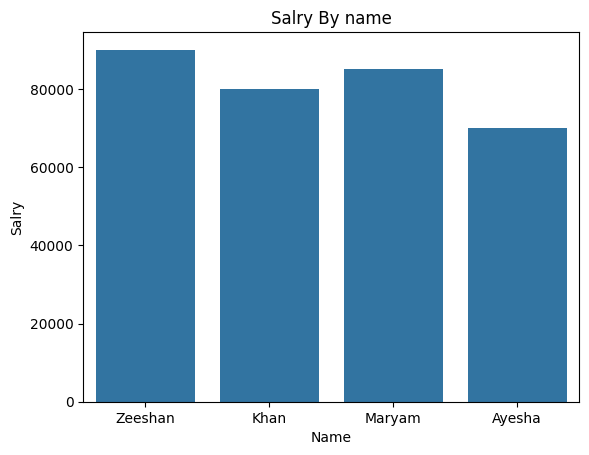

In [19]:
# Seaborn Bar plo
sns.barplot(x='Name',y='Salry',data=df)
plt.title('Salry By name')
plt.show()

# Simplified SQL integration 

In [23]:
# Setting up a SQLite in-memory database
conn = sqlite3.connect(':memory:')  # Create an in-memory database (temporary)

# Creating a table to store employee data
cursor = conn.cursor()  # Create a cursor object to interact with the database
cursor.execute('''CREATE TABLE employees (Name TEXT, Age INTEGER, Salry INTEGER)''')  # Create a table

# Inserting data from the DataFrame into the SQL table
for row in df.itertuples():  # Loop through each row in the DataFrame
    cursor.execute('''INSERT INTO employees (Name, Age, Salry) VALUES (?, ?, ?)''', (row.Name, row.Age, row.Salry))  # Insert data into the table

# Querying the data from the SQL table
cursor.execute('''SELECT * FROM employees WHERE Salry > 80000''')  # Select employees with a salary greater than 80000
rows = cursor.fetchall()  # Fetch all the matching rows

# Displaying the results
for row in rows:  # Loop through the fetched rows
    print(row)  # Print each row

# Closing the database connection
conn.close()  # Close the connection


('Zeeshan', 22, 90000)
('Maryam', 23, 85000)


In [24]:
# Case Study: Predicting Salaries based on Age using Simple Linear Regression
from sklearn.linear_model import LinearRegression  # Import LinearRegression model

# Preparing the data for the model
X = df[['Age']]  # Independent variable (Age)
y = df['Salry']  # Dependent variable (Salary)

# Building and training the model
model = LinearRegression()  # Create a LinearRegression model
model.fit(X, y)  # Fit the model with the data

# Predicting the salary for a new employee aged 28
predicted_salary = model.predict([[28]])  # Predict salary for age 28
print("Predicted Salary for age 28:", predicted_salary[0])  # Print the predicted salary


Predicted Salary for age 28: 117000.0


c:\Users\basze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
